In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import colors 
import plot_settings
from plot_settings import colors

%config InlineBackend.figure_format = 'retina'

In [2]:
df_spotify_c = pd.read_csv('spotify_streams_2024_cleaned.csv')
df_spotify_c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 28 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Track                       4600 non-null   object 
 1   Album Name                  4600 non-null   object 
 2   Artist                      4595 non-null   object 
 3   Release Date                4600 non-null   object 
 4   ISRC                        4600 non-null   object 
 5   All Time Rank               4600 non-null   object 
 6   Track Score                 4600 non-null   float64
 7   Spotify Streams             4487 non-null   float64
 8   Spotify Playlist Count      4530 non-null   float64
 9   Spotify Playlist Reach      4528 non-null   float64
 10  Spotify Popularity          3796 non-null   float64
 11  YouTube Views               4292 non-null   float64
 12  YouTube Likes               4285 non-null   float64
 13  TikTok Posts                3427 

In [3]:
df_spot_cle_tr = df_spotify_c
drop_c = ['Album Name','Release Date', 'ISRC','YouTube Playlist Reach',
       'Apple Music Playlist Count', 'AirPlay Spins', 'SiriusXM Spins',
       'Deezer Playlist Count', 'Deezer Playlist Reach',
       'Amazon Playlist Count', 'Pandora Streams', 'Pandora Track Stations',
       'Soundcloud Streams', 'Shazam Counts', 'Explicit Track']
df_spot_cle_tr = df_spot_cle_tr.drop(columns=drop_c)

In [4]:
df_spot_cle_tr.describe()

,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views
count,4600.000000,4.487000e+03,4530.000000,4.528000e+03,3796.000000,4.292000e+03,4.285000e+03,3.427000e+03,3.620000e+03,3.619000e+03
mean,41.844043,4.473873e+08,59390.829801,2.334682e+07,63.501581,4.027967e+08,2.930049e+06,9.443076e+05,1.126375e+08,1.161158e+09
std,38.543766,5.384439e+08,71131.406625,2.968717e+07,16.186438,7.019000e+08,4.593640e+06,2.442080e+06,5.498123e+08,5.881584e+09
min,19.400000,1.071000e+03,1.000000,1.000000e+00,1.000000,9.130000e+02,2.500000e+01,1.000000e+00,3.000000e+00,1.900000e+01
25%,23.300000,7.038630e+07,6718.000000,4.791612e+06,61.000000,4.073032e+07,4.095490e+05,3.818650e+04,5.814876e+06,5.902786e+07
50%,29.900000,2.398507e+08,32312.500000,1.325948e+07,67.000000,1.482696e+08,1.257935e+06,1.822000e+05,2.653441e+07,2.659172e+08
75%,44.425000,6.283638e+08,86038.750000,2.966069e+07,73.000000,4.647882e+08,3.573193e+06,7.948775e+05,9.328418e+07,9.134169e+08
max,725.400000,4.281469e+09,590392.000000,2.623434e+08,96.000000,1.632276e+10,6.231118e+07,4.290000e+07,2.347422e+10,2.332323e+11


In [5]:
df_spot_cle_tr.head()

,Track,Artist,All Time Rank,Track Score,Spotify Streams,Spotify Playlist Count,Spotify Playlist Reach,Spotify Popularity,YouTube Views,YouTube Likes,TikTok Posts,TikTok Likes,TikTok Views
0,MILLION DOLLAR BABY,Tommy Richman,1,725.4,3.904709e+08,30716.0,196631588.0,92.0,8.427475e+07,1713126.0,5767700.0,6.515659e+08,5.332282e+09
1,Not Like Us,Kendrick Lamar,2,545.9,3.237039e+08,28113.0,174597137.0,92.0,1.163470e+08,3486739.0,674700.0,3.522355e+07,2.083390e+08
2,i like the way you kiss me,Artemas,3,538.4,6.013093e+08,54331.0,211607669.0,92.0,1.225991e+08,2228730.0,3025400.0,2.751542e+08,3.369121e+09
3,Flowers,Miley Cyrus,4,444.9,2.031281e+09,269802.0,136569078.0,85.0,1.096101e+09,10629796.0,7189811.0,1.078758e+09,1.460373e+10
4,Houdini,Eminem,5,423.3,1.070349e+08,7223.0,151469874.0,88.0,7.737396e+07,3670188.0,16400.0,NaN,NaN


In [6]:
w_yout_views = .3
w_tik_views = .3
w_score = .4

#normalizing rating
df_spot_fi = df_spot_cle_tr.fillna({
    'YouTube Views': 0,  
    'TikTok Views': 0,  
    'Track Score': 0 })

df_spot_fi['Normalized Track Score'] = df_spot_fi['Track Score']/1000

#weighted score
df_spot_fi['Weighted Score'] = (w_yout_views * df_spot_fi['YouTube Views'] + w_tik_views*df_spot_fi['TikTok Views'] + w_score * df_spot_fi['Normalized Track Score'])



In [7]:
df_spot_int_group = df_spot_fi.groupby('Artist')['Weighted Score'].sum().reset_index()
df_top_100_group = df_spot_int_group[(df_spot_int_group['Weighted Score'] > 100000.0) & (df_spot_int_group['Weighted Score'] < 500000000)]
df_top_100_group= df_top_100_group[0:101].copy()
df_top_100_gsorted = df_top_100_group.sort_values(by='Weighted Score', ascending=False)
df_top_100_gsorted['Artist Index'] = np.arange(len(df_top_100_gsorted))


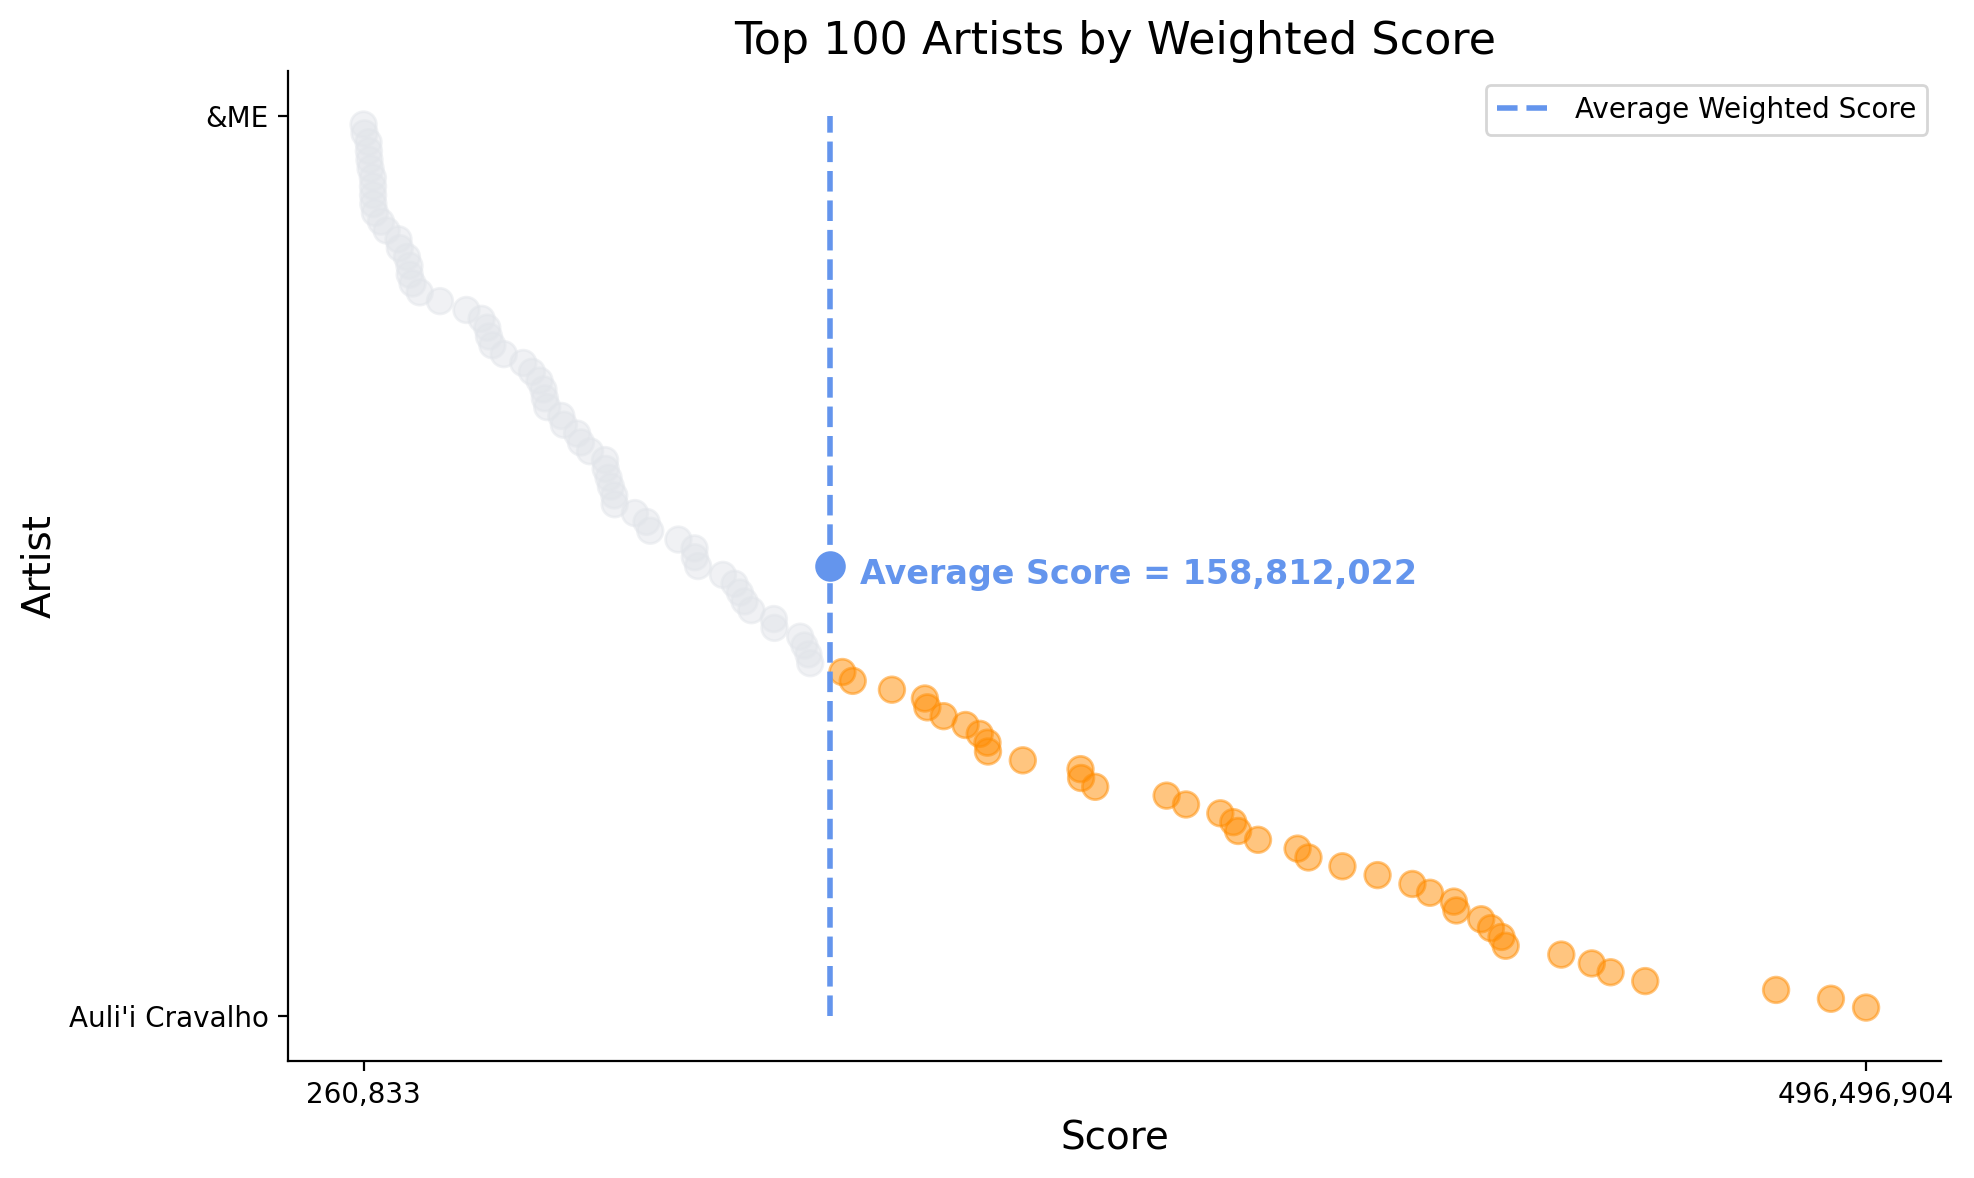

In [8]:

mx = df_top_100_gsorted['Weighted Score'].mean()
my = len(df_top_100_gsorted) // 2

x = np.linspace(df_top_100_gsorted['Weighted Score'].min(), df_top_100_gsorted['Weighted Score'].max(), num=2)
ymi = -1
yma = len(df_top_100_gsorted)
artist_a = df_top_100_gsorted.iloc[0]['Artist']
artist_z = df_top_100_gsorted.iloc[-1]['Artist']

col = np.where(df_top_100_gsorted['Weighted Score']<mx, '#E2E5EA', colors['orange'])

fig, ax = plt.subplots()
ax.scatter(df_top_100_gsorted['Weighted Score'], df_top_100_gsorted['Artist'], c=col, alpha=.5, s=85)
ax.scatter(mx, my, c=colors['blue'], s=100)

ax.vlines(x=mx, ymin=-1, ymax=len(df_top_100_gsorted), colors=colors['blue'], linestyles='dashed', lw=2, label="Average Weighted Score")

ax.set_xticks(x)
ax.set_xticklabels([f'{int(tick):,}' for tick in x])
ax.set_yticks([ymi,yma]) 
ax.set_yticklabels([artist_a, artist_z]) 

ax.annotate('Average Score = 158,812,022',(mx+10000000, my-2), c=colors['blue'], size=12, weight='bold' )
ax.set_xlabel('Score')
ax.set_ylabel('Artist')
ax.set_title('Top 100 Artists by Weighted Score')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

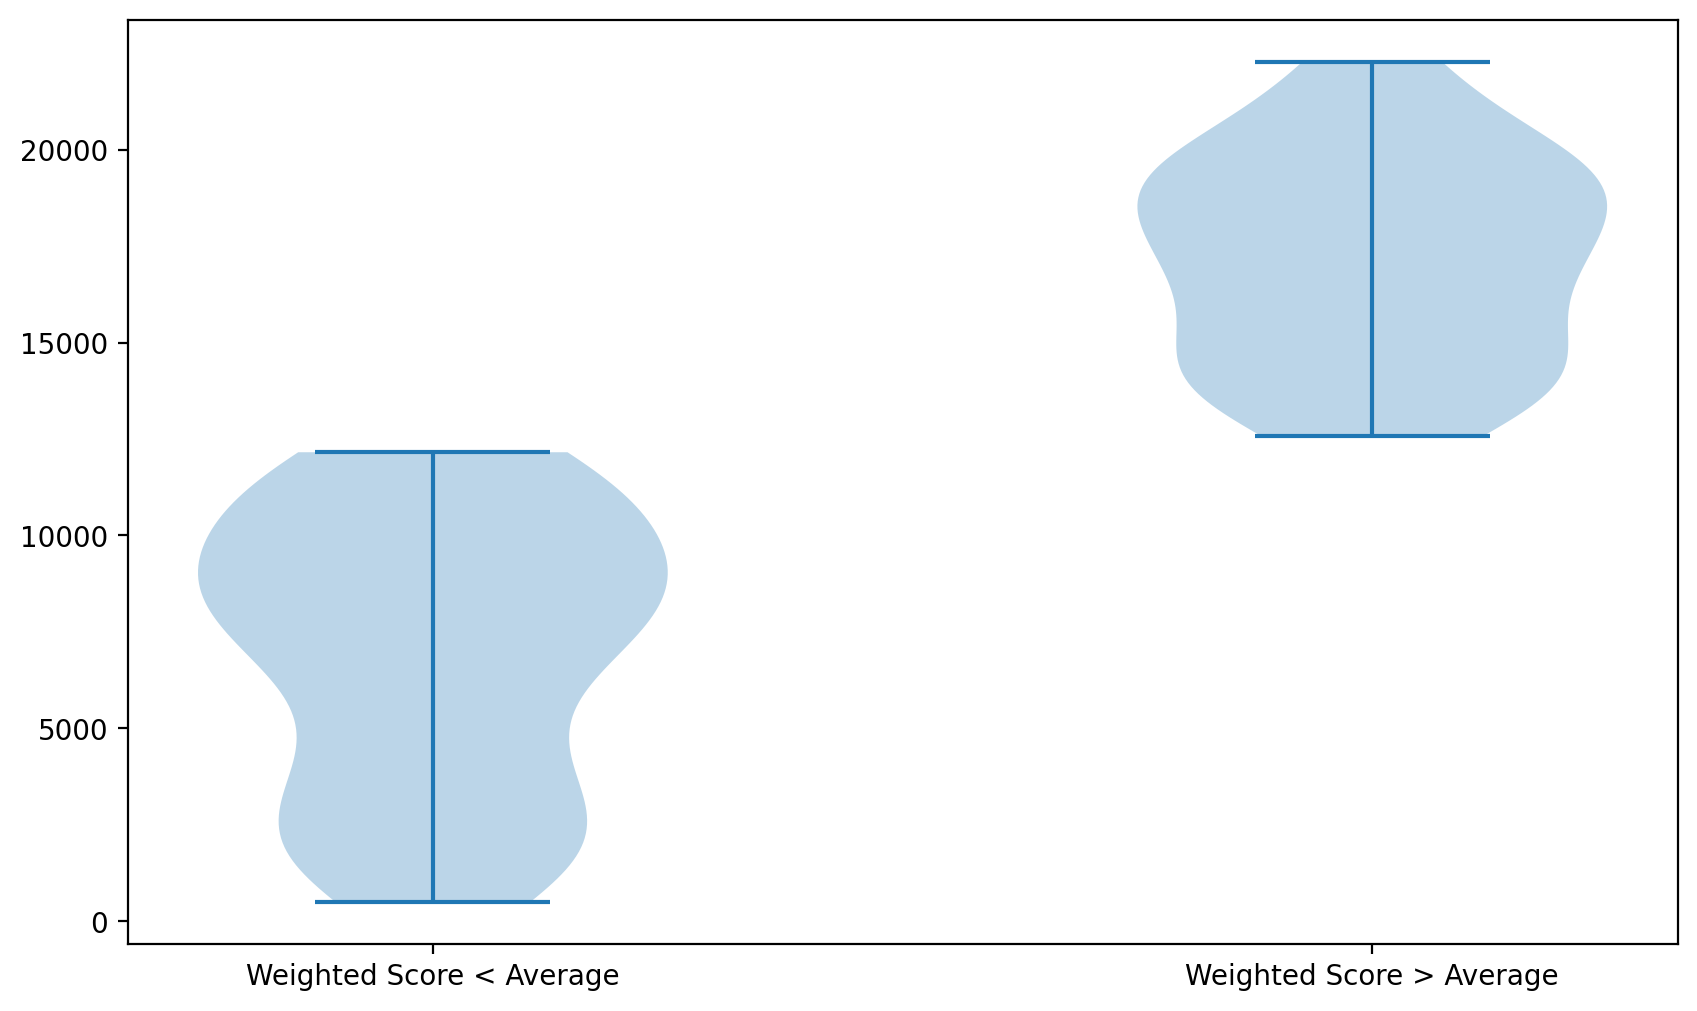

In [9]:
group1 = df_top_100_group[df_top_100_group['Weighted Score'] < mx]['Weighted Score']
group2 = df_top_100_group[df_top_100_group['Weighted Score'] > mx]['Weighted Score']
data_sqrt = [np.sqrt(group1), np.sqrt(group2)]
data1 = (group1,group2)
#plt.violinplot(data1)
plt.violinplot(data_sqrt)
plt.gca().set_aspect('auto')
plt.xticks([1,2],['Weighted Score < Average', 'Weighted Score > Average'])
plt.show()

Newer artists are starting to utilize social media . There are still outliers like BTS that have loyal fanbases leading to higher than higher TikTok likes/views and higher than average YouTube likes/views. When not restricting the data to what's clustered more closely to the mean, we can see how significantly the distributions vary. 

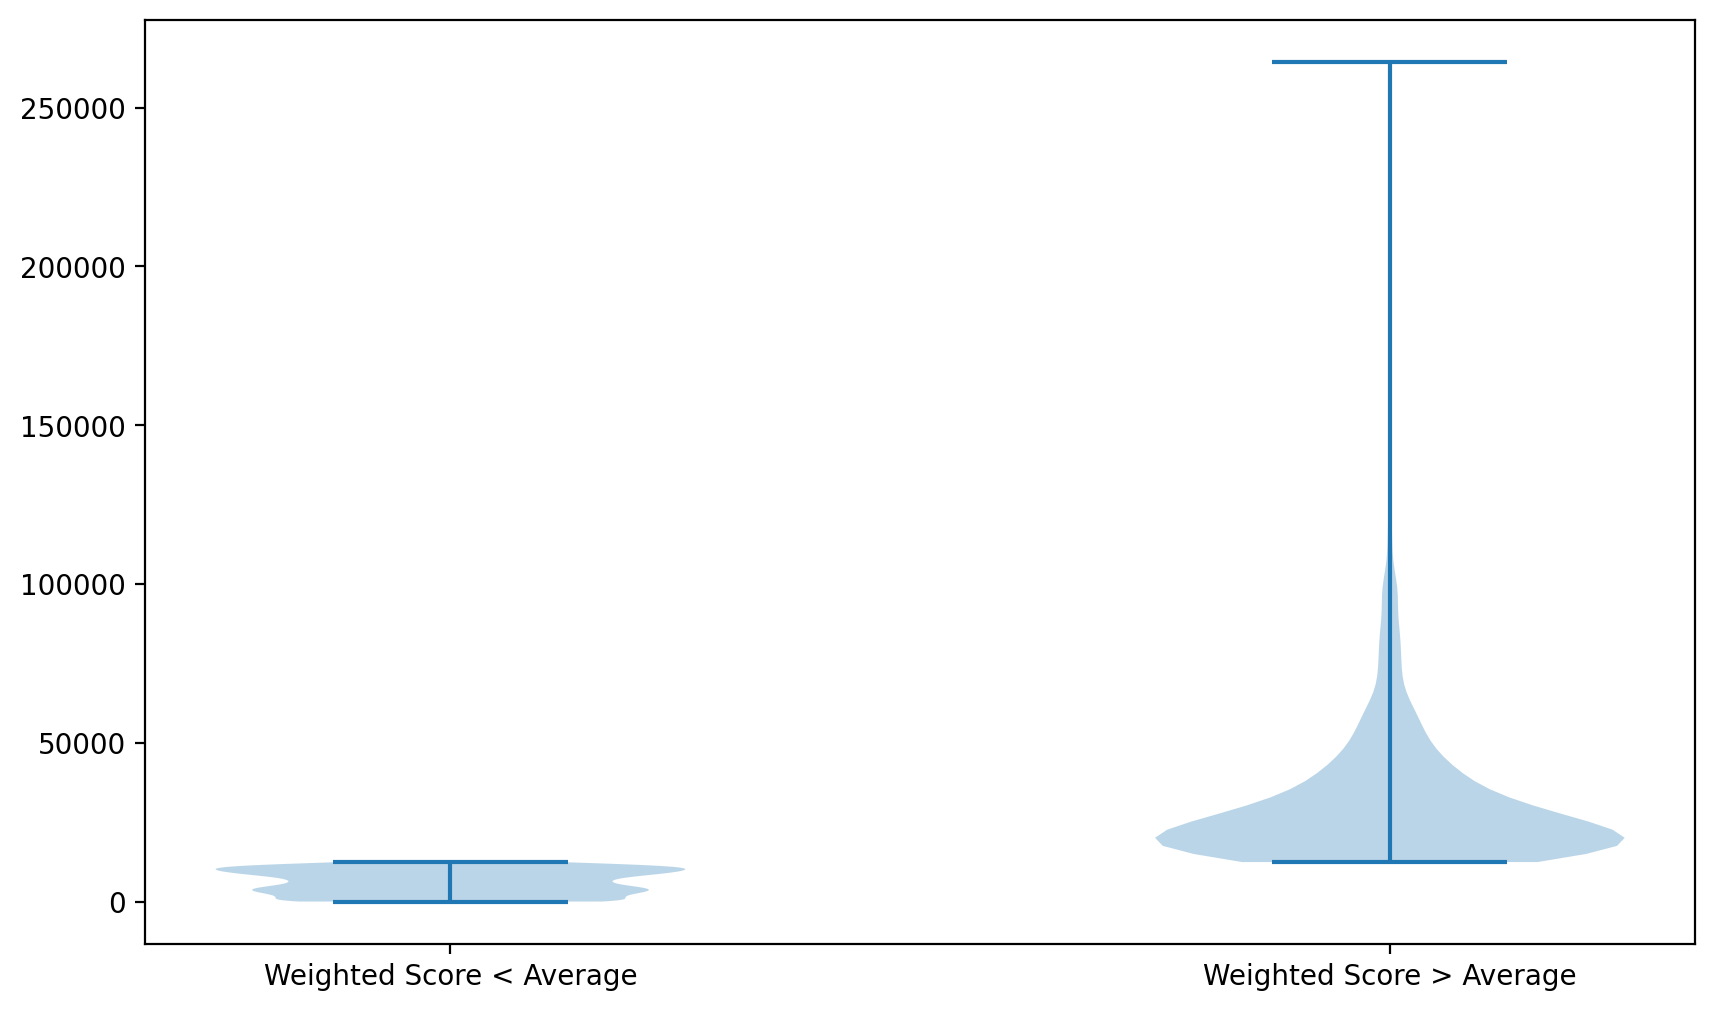

In [12]:
groupa = df_spot_int_group[df_spot_int_group['Weighted Score'] < mx]['Weighted Score']
groupb = df_spot_int_group[df_spot_int_group['Weighted Score'] > mx]['Weighted Score']
data_sqrt2 = [np.sqrt(groupa), np.sqrt(groupb)]
data2 = (groupa,groupb)
plt.violinplot(data_sqrt2)
plt.gca().set_aspect('auto')
plt.xticks([1,2],['Weighted Score < Average', 'Weighted Score > Average'])
plt.show()